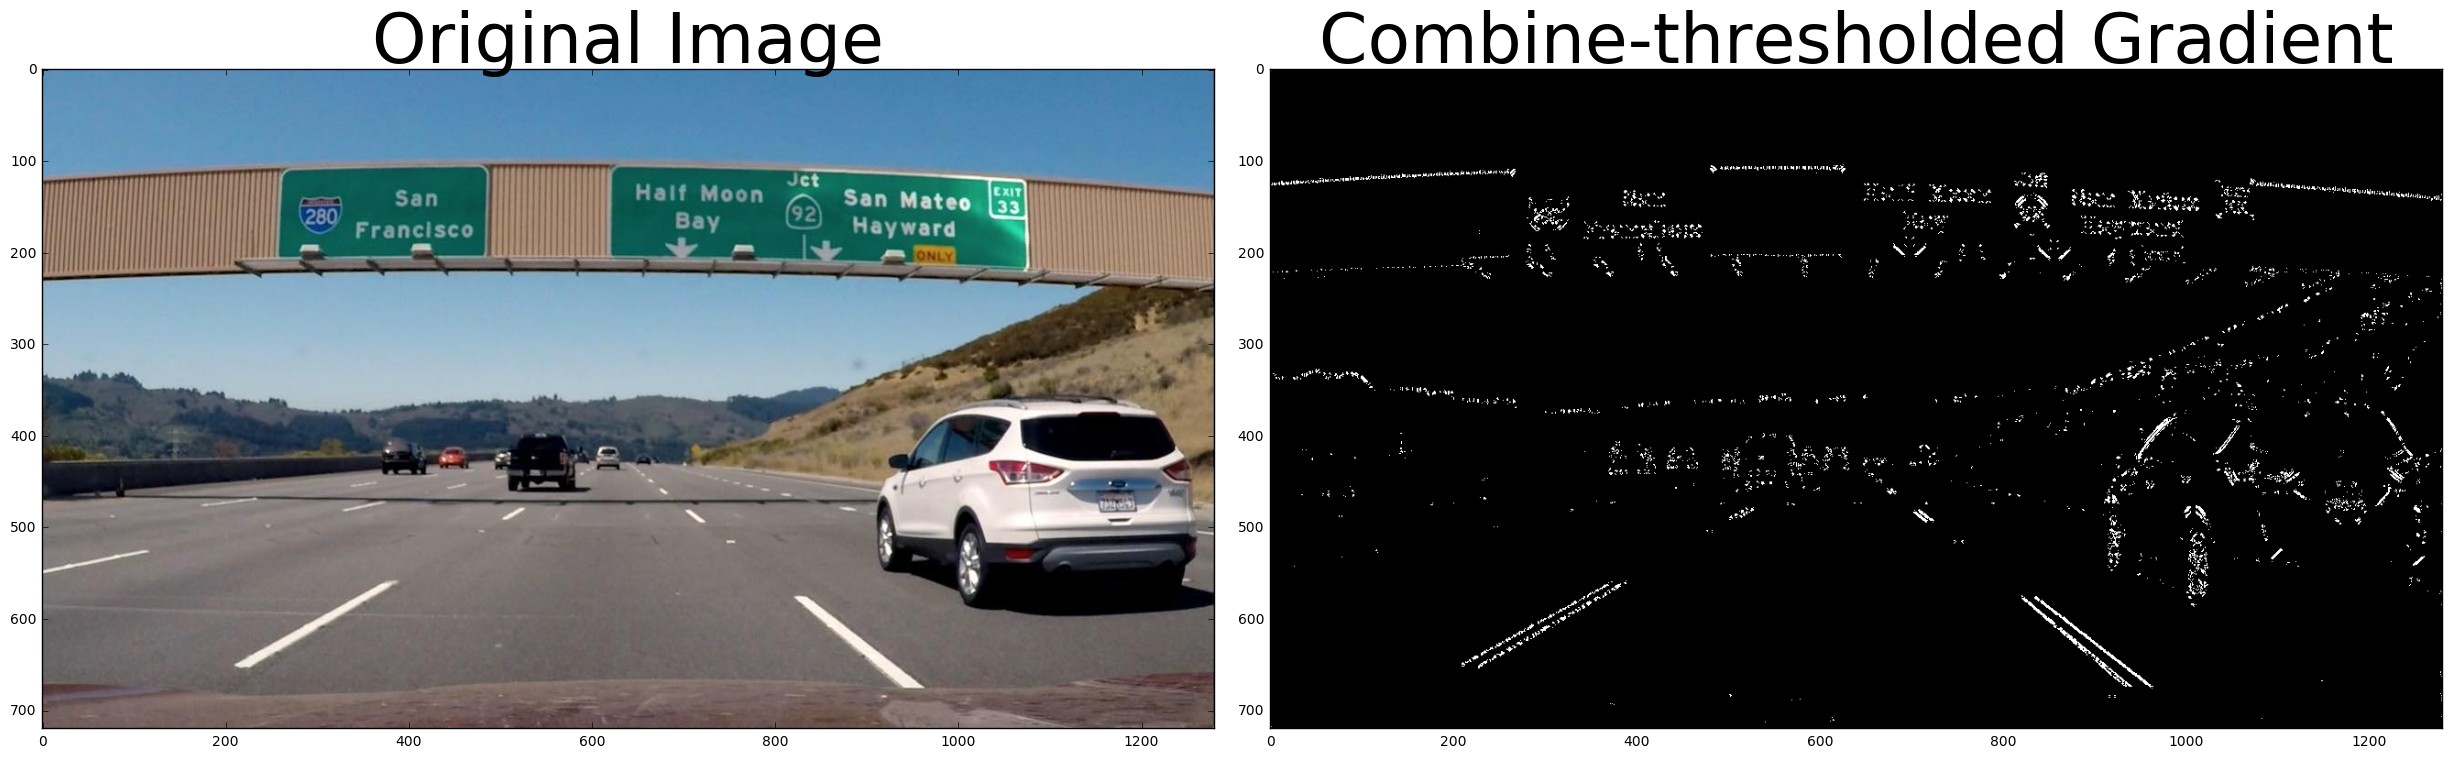

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient=='x':
        x=1
        y=0
    else:
        x=0
        y=1
    dimg = cv2.Sobel(img_gray, cv2.CV_64F, x, y, ksize=sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_dimg = np.abs(dimg)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scale_dimg = 255.0 * abs_dimg/(np.max(abs_dimg))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    img_mask = np.zeros_like(scale_dimg)
    img_mask[(scale_dimg>thresh[0]) & (scale_dimg<thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = img_mask
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    assert (sobel_kernel%2==1)
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    dx_img = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    dy_img = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    mag_dimg = np.sqrt(dx_img*dx_img+dy_img*dy_img)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_mag_dimg = np.uint(255.0 * mag_dimg/(np.max(mag_dimg)))
    # 5) Create a binary mask where mag thresholds are met
    img_mask = np.zeros_like(scale_mag_dimg)
    img_mask[(scale_mag_dimg>mag_thresh[0]) & (scale_mag_dimg<mag_thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = img_mask
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    assert (sobel_kernel%2==1)
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    dx_img = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    dy_img = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_dx_img = np.absolute(dx_img)
    abs_dy_img = np.absolute(dy_img)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_dimg = np.arctan2(abs_dy_img, abs_dx_img)
    # 5) Create a binary mask where direction thresholds are met
    img_mask = np.zeros_like(dir_dimg)
    img_mask[(dir_dimg>thresh[0]) & (dir_dimg<thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = img_mask
    return binary_output
    
# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 150))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 150))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(np.pi/7, np.pi/3))

#Combine all filters together
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Combine-thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)